# Infnet
## Projeto de Bloco 
## Machine Learning

In [0]:
# Ignora Warnings
import warnings
warnings.filterwarnings("ignore")

# Regressão Linear com Scikit-Learn

In [0]:
# Regressão Linear
# https://dadosaocubo.com/regressao-com-scikit-learn/
# https://scikit-learn.org/0.24/modules/generated/sklearn.datasets.load_boston.html

# Importação de bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [0]:
# Selecionando os dados do load_boston
boston = load_boston()
# Atribuindo as variáveis features, target, feature_names os seus valores correspondentes
features, target, feature_names = boston.data, boston.target, boston.feature_names
# Transformamos com o pandas esses dados em um DataFrame
df = pd.DataFrame(data=features, columns=feature_names)
# Juntamos ao DataFrame o target(y), nossa saida
df['PRICE'] = target
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [0]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [0]:
# Selecionando variáveis para o modelo
X = df[['LSTAT']]
y = df.PRICE

In [0]:
# Dividindo dados em treinamento (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [0]:
# Criando o modelo LinearRegression
regr = LinearRegression()
# Realizar treinamento do modelo
regr.fit(X_train, y_train)
# Realizar predição com os dados separados para teste
y_pred = regr.predict(X_test)
# Visualização dos 20 primeiros resultados
y_pred[:20]

Out[157]: array([11.54114225, 25.33601387, 17.32020469, 20.09453864, 25.56640839,
       20.57452722, 28.19674577, 25.94079948, 31.47026785, 29.38711744,
       25.53760907, 18.89456721, 23.70405272, 20.86252036, 22.49448151,
       26.82397845, 19.2689583 , 19.16336081, 11.64673974, 22.03369248])

# Avaliação do Modelo

In [0]:
# https://medium.com/data-hackers/prevendo-n%C3%BAmeros-entendendo-m%C3%A9tricas-de-regress%C3%A3o-35545e011e70
# Avaliação do Modelo - Erro Médio Absoluto ( MAE - Mean Absolute Error) 
# O erro médio absoluto (MAE) é a média da soma de todos os e do nosso gráfico de erros, as sua análise sofre uma interferência devido aos erros positivos e negativos se anularem.
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

# Erro Quadrado Médio (MSE - Mean Squared Error)
# é a média da soma de todos os e elevados ao quadrado do nosso gráfico, o fato de ele ter as diferenças elevadas ao quadrados resolve o problema de os erros positivos e negativos se anulam, sendo mais preciso que o MAE.
print('MSE - Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Coeficiente de Determinação (R2 Score)
# (R²) varia entre 0 e 1 e expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Explicando a variância da variável dependente a partir da variável independente.
#No nosso exemplo o R² = 0,53 significa que o modelo linear explica 53% da variância da variável dependente a partir da variável independente.
print('R2 Score: %.2f' % r2_score(y_test, y_pred))

MAE: 4.35
MSE - Mean squared error: 38.47
R2 Score: 0.56


Out[159]: <AxesSubplot:xlabel='PRICE'>

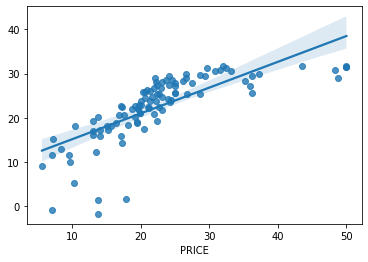

In [0]:
import seaborn as sns

#create scatterplot with regression line and confidence interval lines
sns.regplot(y_test, y_pred)

# Matriz de Correlação de Pearson e Spearman
Correlação calcula a matriz de correlação para o conjunto de dados de vetores de entrada usando o método especificado. A saída será um DataFrame que contém a matriz de correlação da coluna de vetores.

In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

data = [(Vectors.sparse(4, [(0, 1.0), (3, -2.0)]),),
        (Vectors.dense([4.0, 5.0, 0.0, 3.0]),),
        (Vectors.dense([6.0, 7.0, 0.0, 8.0]),),
        (Vectors.sparse(4, [(0, 9.0), (3, 1.0)]),)]
df = spark.createDataFrame(data, ["features"])
df.show()

+--------------------+
|            features|
+--------------------+
|(4,[0,3],[1.0,-2.0])|
|   [4.0,5.0,0.0,3.0]|
|   [6.0,7.0,0.0,8.0]|
| (4,[0,3],[9.0,1.0])|
+--------------------+



In [0]:
from pyspark.ml.stat import Correlation
r1 = Correlation.corr(df, "features").head()
print("Pearson correlation matrix:\n" + str(r1[0]))

Pearson correlation matrix:
DenseMatrix([[1.        , 0.05564149,        nan, 0.40047142],
             [0.05564149, 1.        ,        nan, 0.91359586],
             [       nan,        nan, 1.        ,        nan],
             [0.40047142, 0.91359586,        nan, 1.        ]])


In [0]:
r2 = Correlation.corr(df, "features", "spearman").head()
print("Spearman correlation matrix:\n" + str(r2[0]))

Spearman correlation matrix:
DenseMatrix([[1.        , 0.10540926,        nan, 0.4       ],
             [0.10540926, 1.        ,        nan, 0.9486833 ],
             [       nan,        nan, 1.        ,        nan],
             [0.4       , 0.9486833 ,        nan, 1.        ]])


# Spark ML

In [0]:
carros = spark.read.csv("/FileStore/tables/Carros.csv", header=True, inferSchema=True, sep=";")
print('Contagem de Carros',carros.count())
carros.show(5)

Contagem de Carros 32
+-------+---------+-----------+---------------+----+-----+---------+-----------+-------+-----------+---+
|Consumo|Cilindros|Cilindradas|RelEixoTraseiro|Peso|Tempo|TipoMotor|Transmissao|Marchas|Carburadors| HP|
+-------+---------+-----------+---------------+----+-----+---------+-----------+-------+-----------+---+
|     21|        6|        160|             39| 262| 1646|        0|          1|      4|          4|110|
|     21|        6|        160|             39|2875| 1702|        0|          1|      4|          4|110|
|    228|        4|        108|            385| 232| 1861|        1|          1|      4|          1| 93|
|    214|        6|        258|            308|3215| 1944|        1|          0|      3|          1|110|
|    187|        8|        360|            315| 344| 1702|        0|          0|      3|          2|175|
+-------+---------+-----------+---------------+----+-----+---------+-----------+-------+-----------+---+
only showing top 5 rows



In [0]:
# Vetorizar e transformar utilizando RFormula
from pyspark.ml.feature import RFormula
#Paramêtros
Rformula = RFormula(formula="HP ~ Consumo + Cilindros + Cilindradas", featuresCol="independente", labelCol="HPdependente")
# Aplicação do RFormula
carrosrf = Rformula.fit(carros).transform(carros)
# Mostra resultados
carrosrf.select("independente", "HPdependente").show(5,truncate=False)

+-----------------+------------+
|independente     |HPdependente|
+-----------------+------------+
|[21.0,6.0,160.0] |110.0       |
|[21.0,6.0,160.0] |110.0       |
|[228.0,4.0,108.0]|93.0        |
|[214.0,6.0,258.0]|110.0       |
|[187.0,8.0,360.0]|175.0       |
+-----------------+------------+
only showing top 5 rows



In [0]:
# Separa bases em Treinamento e Testes
CarrosTreino, CarrosTeste = carrosrf.randomSplit([0.8,0.2])
print(CarrosTreino.count())
print(CarrosTeste.count())

26
6


In [0]:
CarrosTreino.select("HPdependente").show(3)

+------------+
|HPdependente|
+------------+
|       335.0|
|       110.0|
|        91.0|
+------------+
only showing top 3 rows



In [0]:
type(CarrosTreino)

Out[167]: pyspark.sql.dataframe.DataFrame

In [0]:
# Importa modelo de regressão linear do Spark ML
from pyspark.ml.regression import LinearRegression
# Parânetrização do modelo
reglin = LinearRegression(featuresCol="independente", labelCol="HPdependente", maxIter=1000, loss="squaredError",
                         standardization=True)
# Treinamento
modelo = reglin.fit(CarrosTreino)

In [0]:
CarrosTeste

Out[169]: DataFrame[Consumo: int, Cilindros: int, Cilindradas: int, RelEixoTraseiro: int, Peso: int, Tempo: int, TipoMotor: int, Transmissao: int, Marchas: int, Carburadors: int, HP: int, independente: vector, HPdependente: double]

In [0]:
previsao = modelo.transform(CarrosTeste)
previsao.select("independente","HPdependente","prediction").show()

+-----------------+------------+------------------+
|     independente|HPdependente|        prediction|
+-----------------+------------+------------------+
| [21.0,6.0,160.0]|       110.0| 172.1421341885302|
|[104.0,8.0,460.0]|       215.0|205.53059979963567|
|[104.0,8.0,472.0]|       205.0|205.46564610186948|
|[147.0,8.0,440.0]|       230.0|197.57881785010008|
|[158.0,8.0,351.0]|       264.0|195.99868756037898|
|[197.0,6.0,145.0]|       175.0|139.23340287361378|
+-----------------+------------+------------------+



In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
avaliar = RegressionEvaluator(predictionCol="prediction", labelCol="HPdependente", metricName="rmse")
rmse = avaliar.evaluate(previsao)
print(rmse)

42.63428241736397
